In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("AAPL.csv")

In [4]:
data.head()

,Date,Close/Last,Volume,Open,High,Low,Tsla_Close
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37,4.778
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96,4.766
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5,4.392
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13,3.840
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23,3.222


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2517 entries, 1 to 2517
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
 2   Volume      2517 non-null   int64         
 3   Open        2517 non-null   float64       
 4   High        2517 non-null   float64       
 5   Low         2517 non-null   float64       
 6   Tsla_Close  2517 non-null   float64       
 7   APPL_Close  2517 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 177.0 KB


In [35]:
data["Date"] = pd.to_datetime(data["Date"])

In [9]:
#converting colo to float
data[['Close/Last', 'Open', 'High', 'Low']] = data[['Close/Last', 'Open', 'High', 'Low']].replace({'\$': ''}, regex=True).astype(float)



In [8]:
data.columns = data.columns.str.strip()


In [ ]:
data.info()

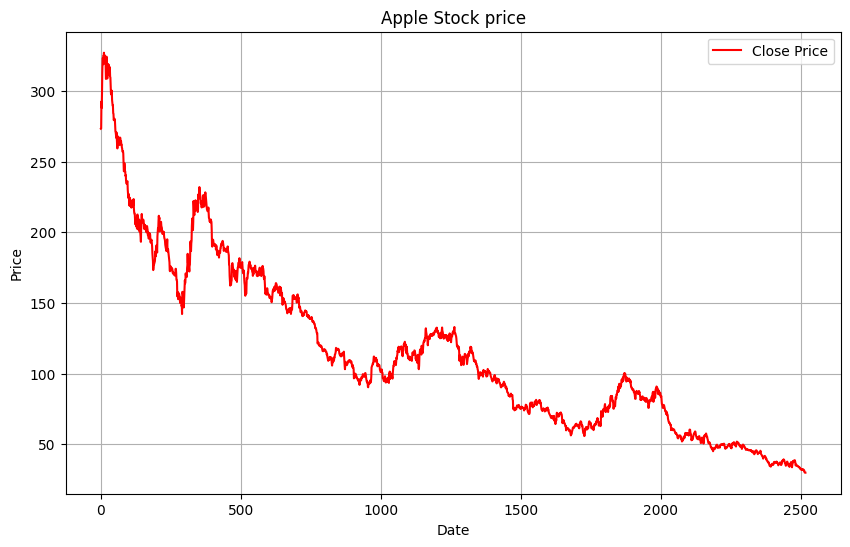

In [19]:
plt.figure(figsize=(10,6))
plt.plot(data.index, data['Close/Last'], label='Close Price', color='red')
plt.title('Apple Stock price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

decom = seasonal_decompose(data['Close/Last'], model='additive', period=365)

In [16]:
trend = decom.trend
seasonal = decom.seasonal
residual = decom.resid

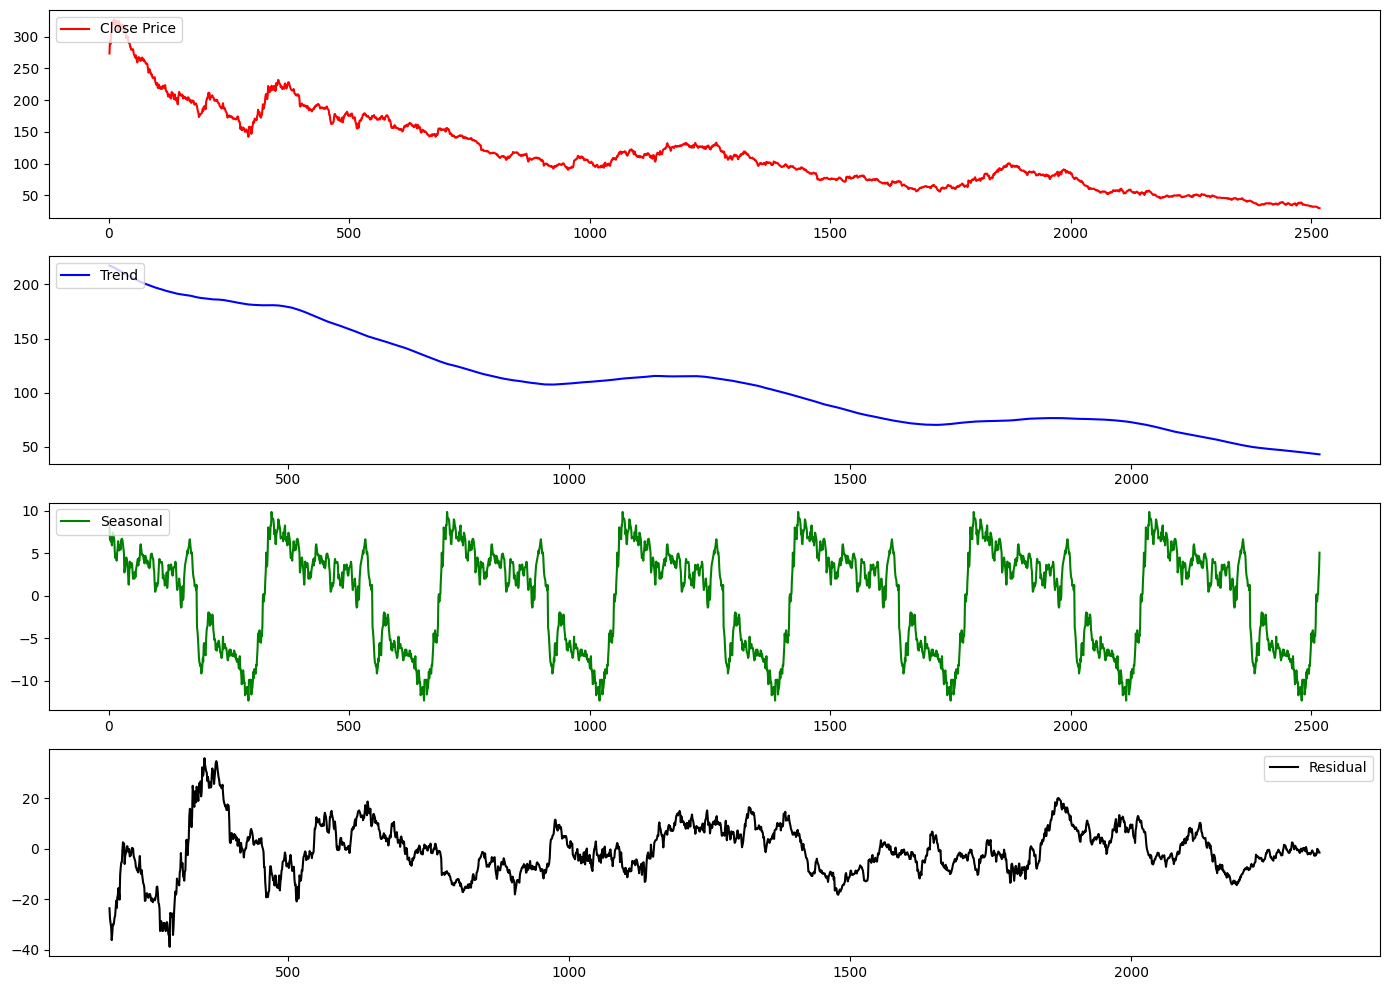

In [17]:
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(data['Close/Last'], label='Close Price', color= 'red')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.subplot(414) 
plt.plot(residual, label='Residual', color='black')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [18]:
from statsmodels.tsa.seasonal import STL



In [19]:
stl=STL(data['Close/Last'], period=365)
results=stl.fit()

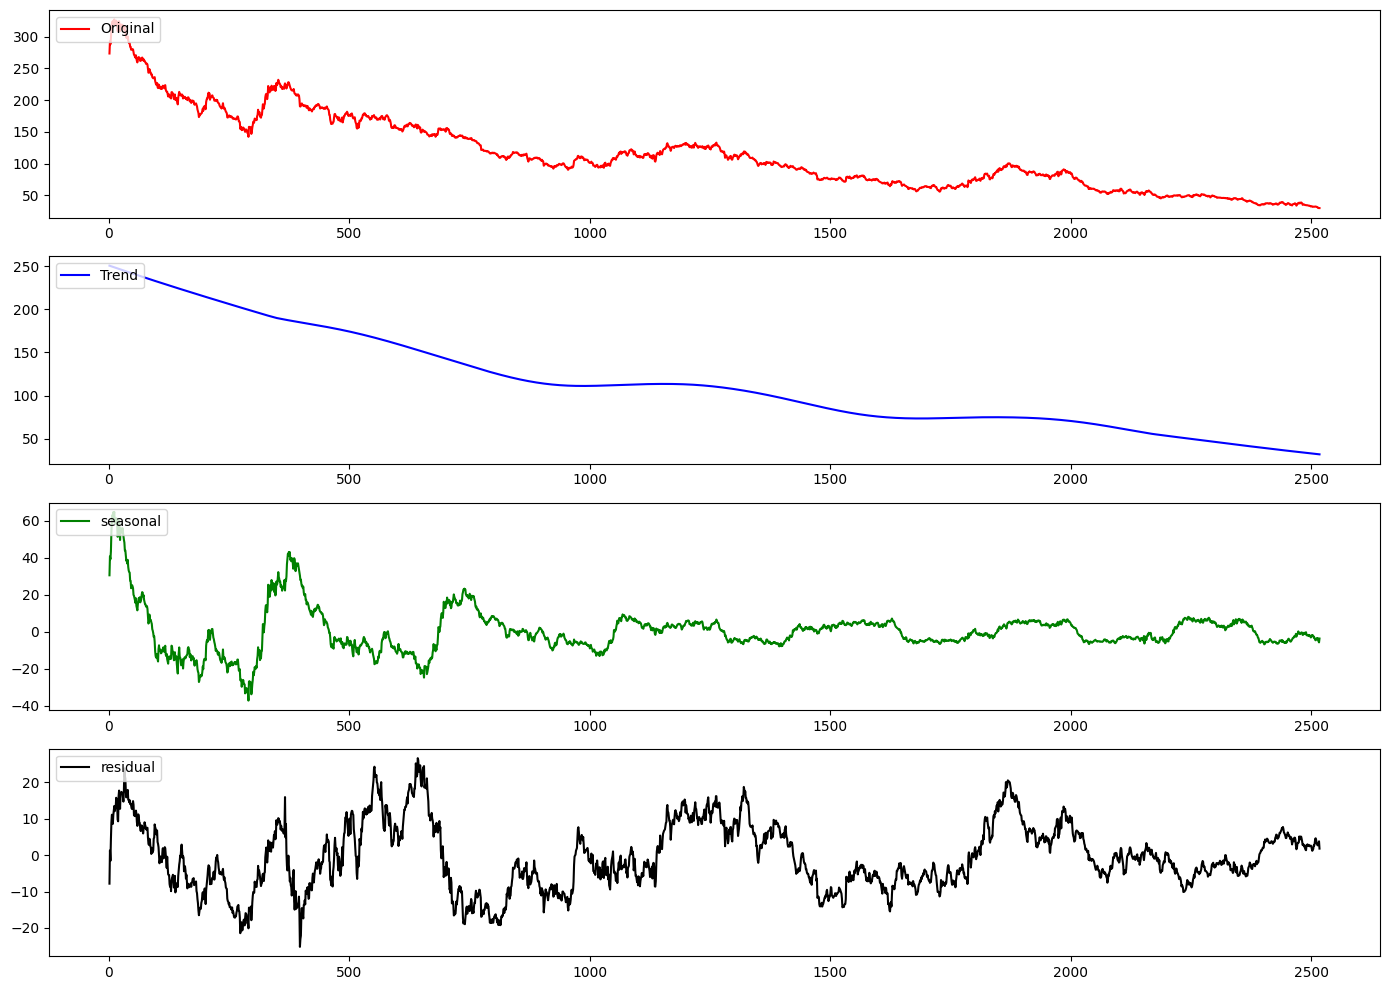

In [20]:
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(results.observed, label='Original', color='red')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(results.trend, label="Trend", color='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(results.seasonal, label="seasonal", color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(results.resid, label="residual", color='black')
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
data1=adfuller(data['Close/Last'])

print('ADF Test Results')
print(f'ADF statistic: {round(data1[0], 3)}')

ADF Test Results
ADF statistic: -3.851


In [23]:
print("P-Value : ", data1[1])

print("critical value:")
for key, value in data1[4].items():
    print(f'{key}:{round(value, 3)}')

P-Value :  0.0024295372164714548
critical value:
1%:-3.433
5%:-2.863
10%:-2.567


In [29]:
print(data1)

(-3.326937437046949, 0.013716478594487472, 19, 2498, {'1%': -3.4329705094097114, '5%': -2.8626977267304357, '10%': -2.5673863028421136}, 10390.503896980328)


In [30]:
from statsmodels.tsa.stattools import kpss

In [31]:
kpss_test=kpss(data['Close/Last'], regression='ct') # c for constant stationarity, ct for trend

print('KPSS_Results')
print(f' KPSS STatistics: {round(kpss_test[0],2)}')
print(f'P-value : {round(kpss_test[1],2)}')
print('Critical values')
for key, value in kpss_test[3].items():
    print(f' {key}:{value}')

KPSS_Results
 KPSS STatistics: 0.84
P-value : 0.01
Critical values
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216


C:\Users\Sajjad\AppData\Local\Temp\ipykernel_36896\2968542951.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test=kpss(data['Close/Last'], regression='ct') # c for constant stationarity, ct for trend


In [24]:
#Making stationary 

In [25]:
def adf(series):
    results = adfuller(series)
    print('ADF Sationary:',  results[0]) 
    print('P-Value :',  results[1])
    print('Critical value')
    for key, value in results[4].items():
        print(f'{key} :{value}')

def kps(series):
    results = kpss(series, regression = 'c')
    print('KPSS Stat:', results[0])
    print('P-value', results[1])
    print('critical value')
    for key, value in results[3].items():
        print({key}, {value})

In [26]:
prices = data['Close/Last']

In [27]:
adf(prices)

ADF Sationary: -3.8506568322439683
P-Value : 0.0024295372164714548
Critical value
1% :-3.4329715599546646
5% :-2.862698190651408
10% :-2.567386549839784


In [32]:
kps(prices)

KPSS Stat: 6.947143569295599
P-value 0.01
critical value
{'10%'} {0.347}
{'5%'} {0.463}
{'2.5%'} {0.574}
{'1%'} {0.739}


C:\Users\Sajjad\AppData\Local\Temp\ipykernel_36896\1235754250.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  results = kpss(series, regression = 'c')


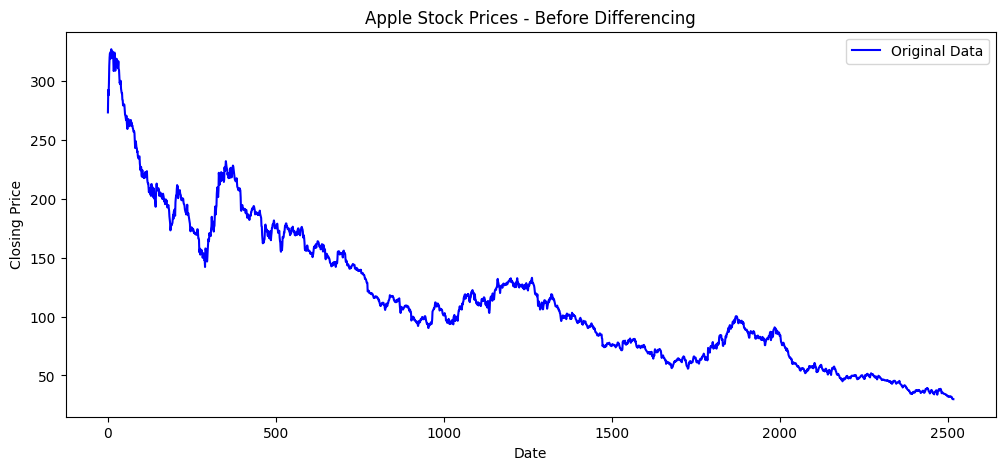

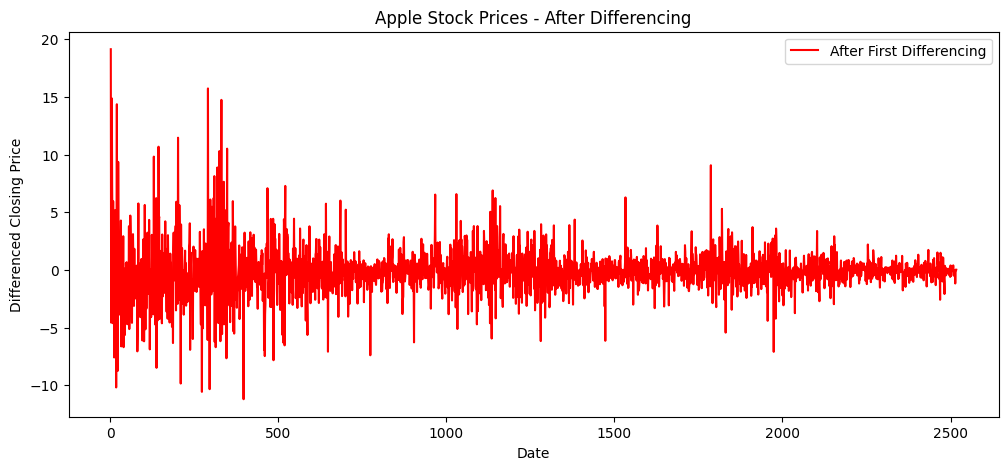

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (Replace with your actual file path)
#df = pd.read_csv("AAPL_stock_data.csv", parse_dates=["Date"], index_col="Date")

# Plot the original time series
plt.figure(figsize=(12, 5))
plt.plot(data["Close/Last"], label="Original Data", color="blue")
plt.title("Apple Stock Prices - Before Differencing")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

# Apply differencing to remove trend
data["Differenced"] = data["Close/Last"].diff()

# Plot the differenced time series
plt.figure(figsize=(12, 5))
plt.plot(data["Differenced"], label="After First Differencing", color="red")
plt.title("Apple Stock Prices - After Differencing")
plt.xlabel("Date")
plt.ylabel("Differenced Closing Price")
plt.legend()
plt.show()


In [37]:
prices.diff() # differencing vlaues

0           NaN
1        0.1600
2       19.1300
3       -4.5700
4       10.1000
         ...   
2513    -0.0185
2514    -1.1772
2515    -0.1971
2516    -0.0686
2517     0.0200
Name: Close/Last, Length: 2518, dtype: float64

In [38]:
prices

0       273.3600
1       273.5200
2       292.6500
3       288.0800
4       298.1800
          ...   
2513     31.2786
2514     30.1014
2515     29.9043
2516     29.8357
2517     29.8557
Name: Close/Last, Length: 2518, dtype: float64

In [39]:
# Transformation

from scipy import stats
import numpy as np
#log transformation
prices_log = np.log(prices)

#square root transformation
prices_square = np.sqrt(prices)

#Box-cox transformation, it requires all positive values
prices_box, lam = stats.boxcox(prices[prices>0])


In [40]:
prices_log


1       5.611375
2       5.678977
3       5.663238
4       5.697697
5       5.746363
          ...   
2513    3.442934
2514    3.404572
2515    3.398002
2516    3.395706
2517    3.396376
Name: Close/Last, Length: 2517, dtype: float64

In [41]:
prices_square


1       16.538440
2       17.107016
3       16.972920
4       17.267889
5       17.693219
          ...    
2513     5.592727
2514     5.486474
2515     5.468482
2516     5.462207
2517     5.464037
Name: Close/Last, Length: 2517, dtype: float64

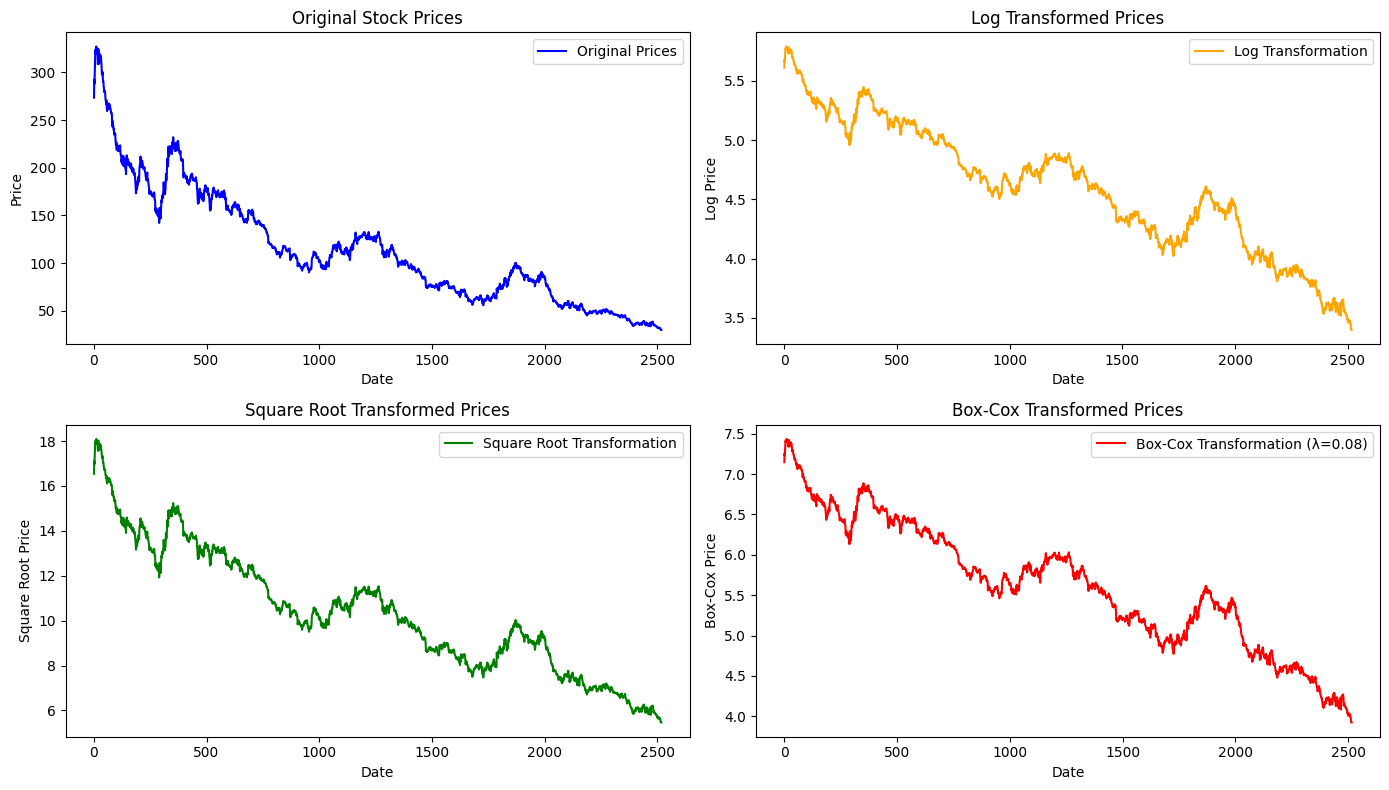

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load dataset (Replace with actual data)
#df = pd.read_csv("AAPL_stock_data.csv", parse_dates=["Date"], index_col="Date")
#prices = df["Close"]  # Selecting closing prices

# Apply transformations
#prices_log = np.log(prices)  # Log transformation
#prices_sqrt = np.sqrt(prices)  # Square root transformation
#prices_box, lam = stats.boxcox(prices[prices > 0])  # Box-Cox transformation (only positive values)

# Plot all transformations in a single figure
plt.figure(figsize=(14, 8))

# Original Prices
plt.subplot(2, 2, 1)
plt.plot(prices, label="Original Prices", color="blue")
plt.title("Original Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# Log Transformation
plt.subplot(2, 2, 2)
plt.plot(prices_log, label="Log Transformation", color="orange")
plt.title("Log Transformed Prices")
plt.xlabel("Date")
plt.ylabel("Log Price")
plt.legend()

# Square Root Transformation
plt.subplot(2, 2, 3)
plt.plot(prices_square, label="Square Root Transformation", color="green")
plt.title("Square Root Transformed Prices")
plt.xlabel("Date")
plt.ylabel("Square Root Price")
plt.legend()

# Box-Cox Transformation
plt.subplot(2, 2, 4)
plt.plot(prices_box, label=f"Box-Cox Transformation (λ={round(lam, 2)})", color="red")
plt.title("Box-Cox Transformed Prices")
plt.xlabel("Date")
plt.ylabel("Box-Cox Price")
plt.legend()

plt.tight_layout()
plt.show()


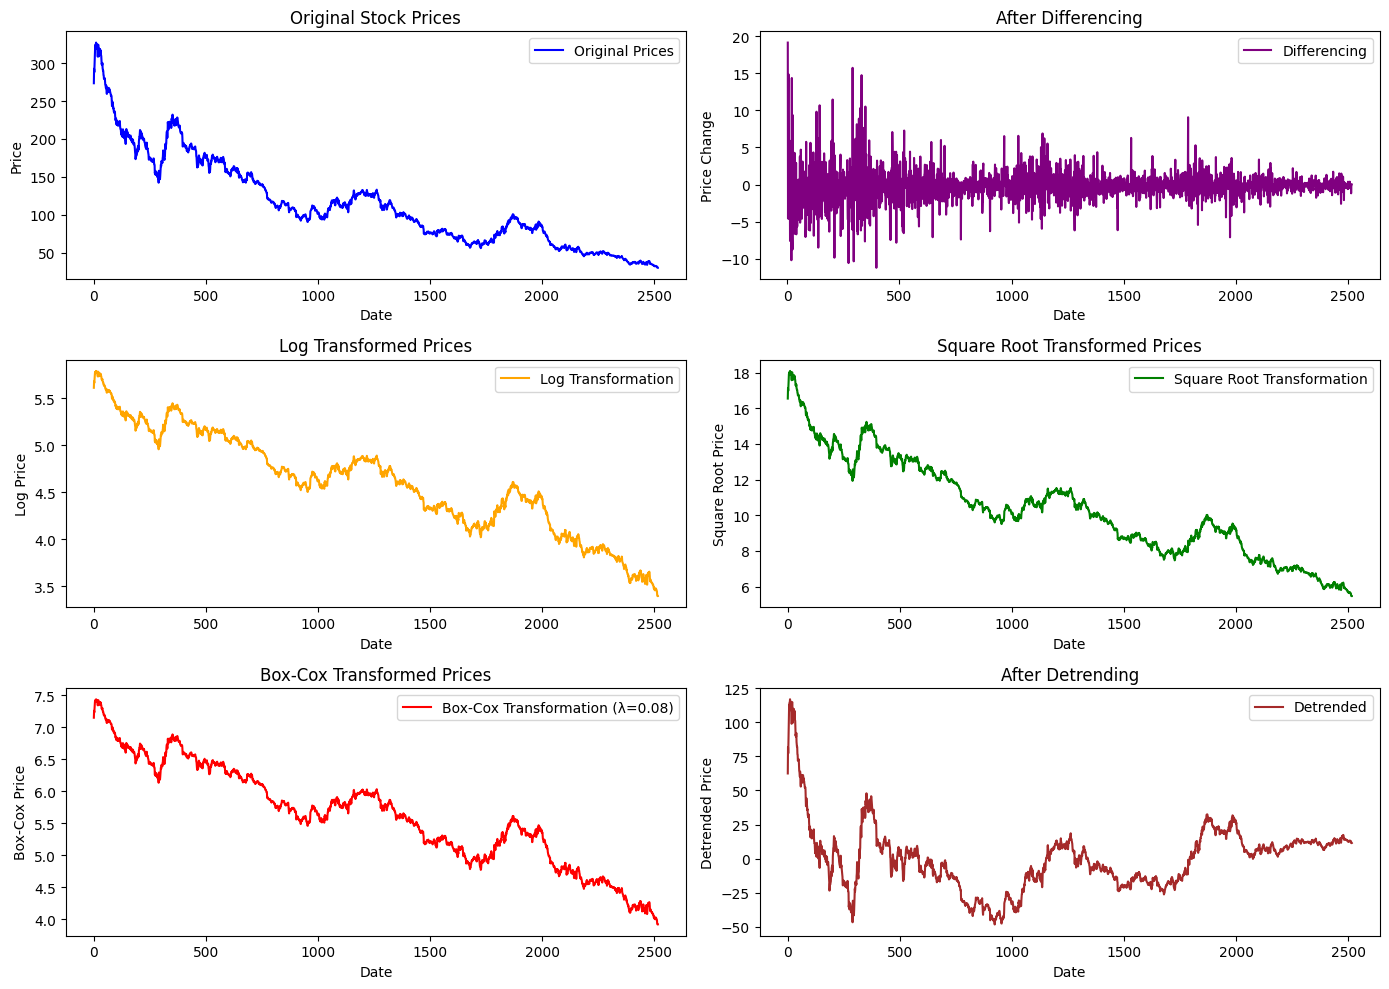

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.signal import detrend

# Load dataset (Replace with actual data)
#df = pd.read_csv("AAPL_stock_data.csv", parse_dates=["Date"], index_col="Date")
#prices = df["Close"]  # Selecting closing prices

# 1. Differencing to remove trend
prices_diff = prices.diff()

# 2. Transformations (Log, Square Root, Box-Cox)
#prices_log = np.log(prices)  # Log transformation
#prices_sqrt = np.sqrt(prices)  # Square root transformation
#prices_box, lam = stats.boxcox(prices[prices > 0])  # Box-Cox transformation (only positive values)

# 3. Detrending (removing linear trend)
prices_detrended = detrend(prices)  # Subtracts the best-fit line

# Plot all stationary techniques in a single figure
plt.figure(figsize=(14, 10))

# Original Prices
plt.subplot(3, 2, 1)
plt.plot(prices, label="Original Prices", color="blue")
plt.title("Original Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# Differencing
plt.subplot(3, 2, 2)
plt.plot(prices_diff, label="Differencing", color="purple")
plt.title("After Differencing")
plt.xlabel("Date")
plt.ylabel("Price Change")
plt.legend()

# Log Transformation
plt.subplot(3, 2, 3)
plt.plot(prices_log, label="Log Transformation", color="orange")
plt.title("Log Transformed Prices")
plt.xlabel("Date")
plt.ylabel("Log Price")
plt.legend()

# Square Root Transformation
plt.subplot(3, 2, 4)
plt.plot(prices_square, label="Square Root Transformation", color="green")
plt.title("Square Root Transformed Prices")
plt.xlabel("Date")
plt.ylabel("Square Root Price")
plt.legend()

# Box-Cox Transformation
plt.subplot(3, 2, 5)
plt.plot(prices_box, label=f"Box-Cox Transformation (λ={round(lam, 2)})", color="red")
plt.title("Box-Cox Transformed Prices")
plt.xlabel("Date")
plt.ylabel("Box-Cox Price")
plt.legend()

# Detrending
plt.subplot(3, 2, 6)
plt.plot(prices_detrended, label="Detrended", color="brown")
plt.title("After Detrending")
plt.xlabel("Date")
plt.ylabel("Detrended Price")
plt.legend()

plt.tight_layout()
plt.show()


In [42]:
adf(prices_log)

ADF Sationary: -0.2557656561669341
P-Value : 0.9315397901556368
Critical value
1% :-3.4329517425474014
5% :-2.862689439250822
10% :-2.5673818904827863


In [43]:
#detrending,linear detrending

trend=np.polyfit(np.arange(len(prices)), prices, 1)
trendline = np.polyval(trend, np.arange(len(prices)))
price_det = prices-trendline

In [ ]:
adf(price_det)

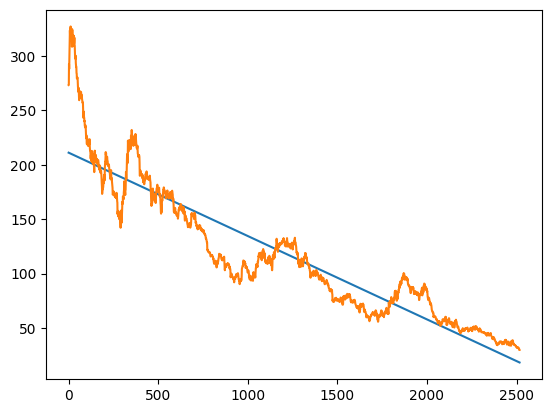

In [45]:
plt.plot(np.arange(len(prices)), trendline)
plt.plot(np.arange(len(prices)), prices)
plt.show()

In [46]:
#MOVING AVERAGE

price_mo = prices.rolling(window=12).mean()
price_detrended = prices - price_mo
price_det=price_detrended.dropna()

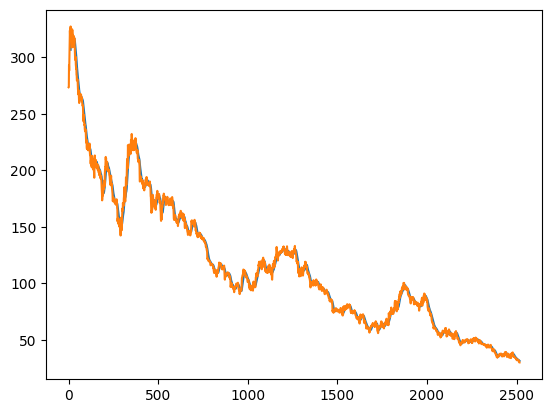

In [47]:
plt.plot(np.arange(len(prices)), price_mo)
plt.plot(np.arange(len(prices)), prices)
plt.show()

In [48]:
#seasonal 

decomposition = seasonal_decompose(prices, model = 'additive', period=365)
price_adj=prices/decomposition.seasonal
price_adj=price_adj.dropna()

In [ ]:
adf(price_adj)

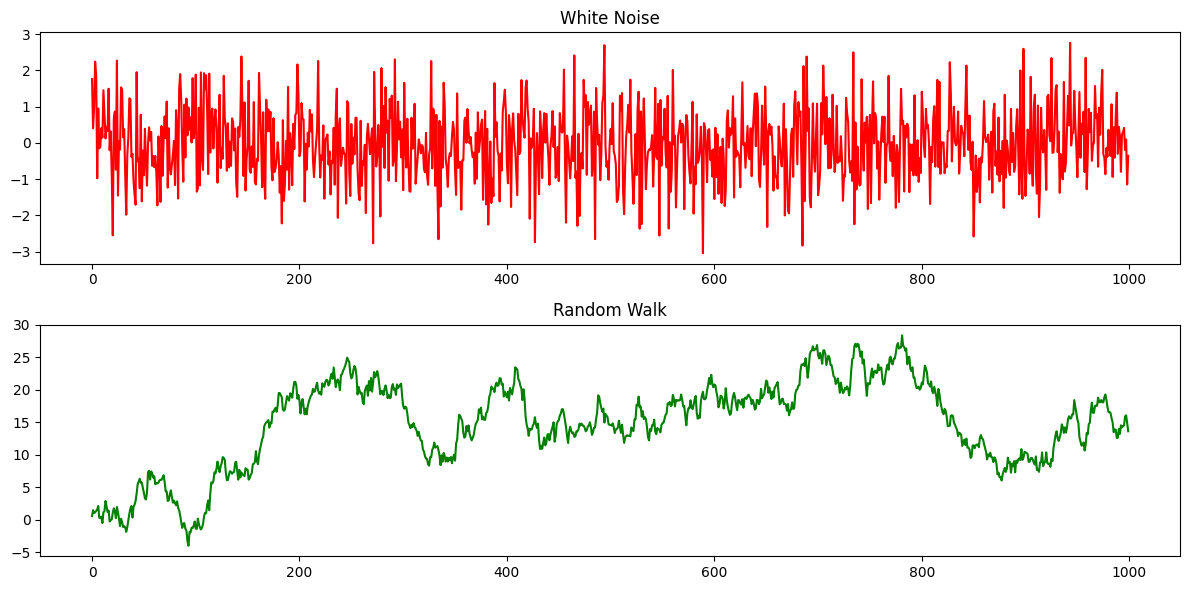

white noise
      lb_stat  lb_pvalue
10  14.025574   0.171828
Random Walk
        lb_stat  lb_pvalue
10  8828.660312        0.0


In [50]:
#Identifying white noise and random walk
from statsmodels.stats.diagnostic import acorr_ljungbox

np.random.seed(0)
n=1000
#white noise
white = np.random.normal(0,1,n)

#random 
random_shok = np.random.normal(0,1,n)
random=np.cumsum(random_shok)

plt.figure(figsize = (12,6))

plt.subplot(2,1,1)
plt.plot(white, color="red")
plt.title("White Noise")


plt.subplot(2,1,2)
plt.plot(random, color="green")
plt.title("Random Walk")

plt.tight_layout()
plt.show()

print("white noise")
test_white= acorr_ljungbox(white, lags=[10], return_df=True)
print(test_white)

print("Random Walk")
test_random= acorr_ljungbox(random, lags=[10], return_df=True)
print(test_random)


In [56]:
# AR model
apple_price = data['Close/Last'].diff().dropna()
train_data, test_data = apple_price[:-30], apple_price[-30:]

In [57]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error


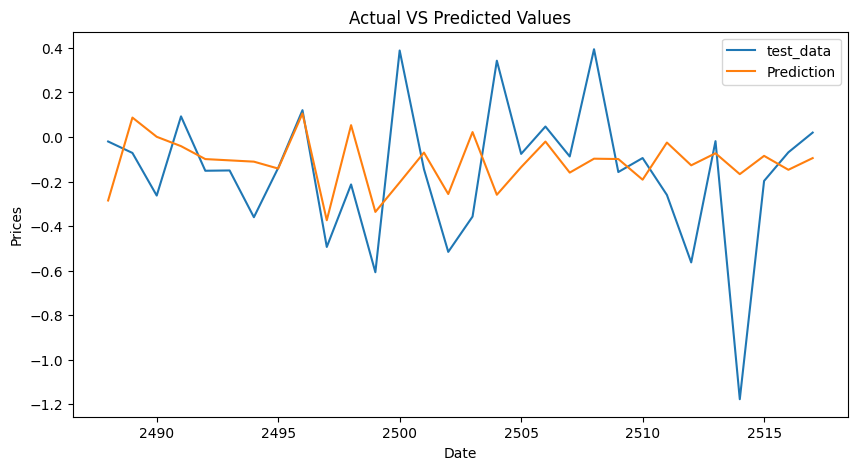

RMSE 0.31


In [72]:
#Fit AR model
model = AutoReg(train_data, lags = 30)
model_fit=model.fit()

#Prediction
prediction =model_fit.predict(
    start=len(train_data),
    end=len(train_data)+len(test_data)-1,
    dynamic=False
)
#For example, if the length of train_data is 1000 and the length of test_data is 200,
#then len(train_data) + len(test_data) equals 1200. But in Python indexing (which is zero-based),
#the last valid index would be 1199, not 1200.-1: By subtracting 1, you ensure the end index is pointing to the correct
#last index in the combined data (i.e., the last index of the test_data). So, in the above example, end would become 1199.

#plot actual and predict data

plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label="test_data")
plt.plot(test_data.index, prediction, label="Prediction")
plt.title("Actual VS Predicted Values")
plt.xlabel("Date")
plt.ylabel("Prices")
plt.legend()
plt.show()


#evaluating model

rmse = round(np.sqrt(mean_squared_error(test_data, prediction)),2)
print("RMSE", rmse)


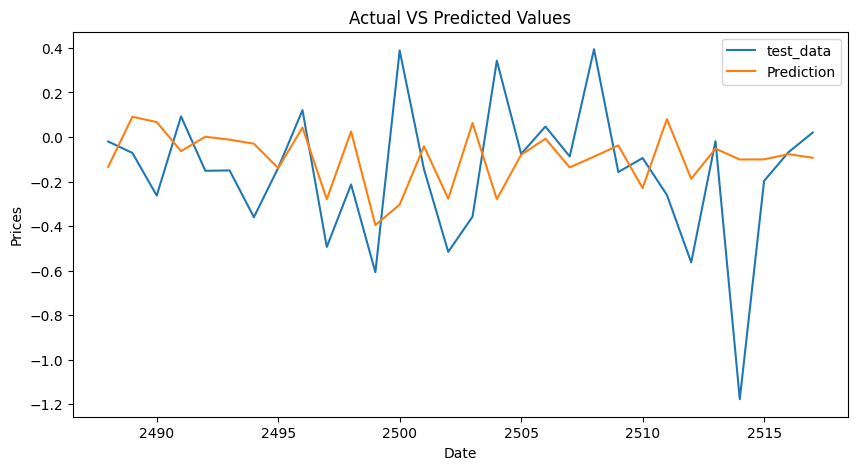

RMSE 0.33


In [73]:
# MA model
from statsmodels.tsa.arima.model import ARIMA

#Fitting the moving average

model =ARIMA(train_data, order=(0,0,30))
model_fit1 =model.fit()

#Prediction
prediction =model_fit1.predict(
    start=len(train_data),
    end=len(train_data)+len(test_data)-1,
    dynamic=False
)

#plot actual and predict data

plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label="test_data")
plt.plot(test_data.index, prediction, label="Prediction")
plt.title("Actual VS Predicted Values")
plt.xlabel("Date")
plt.ylabel("Prices")
plt.legend()
plt.show()


#evaluating model

rmse = round(np.sqrt(mean_squared_error(test_data, prediction)),2)
print("RMSE", rmse)

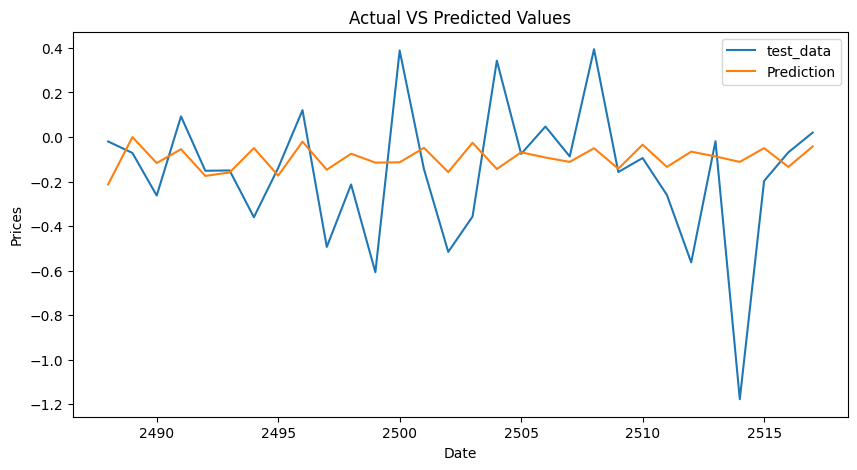

RMSE 0.31


In [74]:
#ARMA Model

model =ARIMA(train_data, order=(7,0,7))
model_fit2=model.fit()


#Prediction
prediction =model_fit2.predict(
    start=len(train_data),
    end=len(train_data)+len(test_data)-1,
    dynamic=False
)

#plot actual and predict data

plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label="test_data")
plt.plot(test_data.index, prediction, label="Prediction")
plt.title("Actual VS Predicted Values")
plt.xlabel("Date")
plt.ylabel("Prices")
plt.legend()
plt.show()


#evaluating model

rmse = round(np.sqrt(mean_squared_error(test_data, prediction)),2)
print("RMSE", rmse)

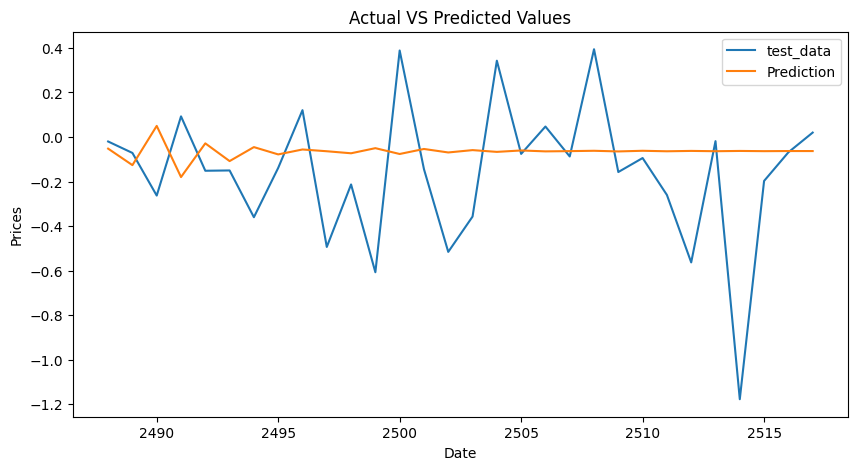

RMSE 0.33


In [75]:
#ARIMA Model

model =ARIMA(train_data, order=(7,1,7))
model_fit3=model.fit()


#Prediction
prediction =model_fit3.predict(
    start=len(train_data),
    end=len(train_data)+len(test_data)-1,
    dynamic=False
)

#plot actual and predict data

plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label="test_data")
plt.plot(test_data.index, prediction, label="Prediction")
plt.title("Actual VS Predicted Values")
plt.xlabel("Date")
plt.ylabel("Prices")
plt.legend()
plt.show()


#evaluating model

rmse = round(np.sqrt(mean_squared_error(test_data, prediction)),2)
print("RMSE", rmse)

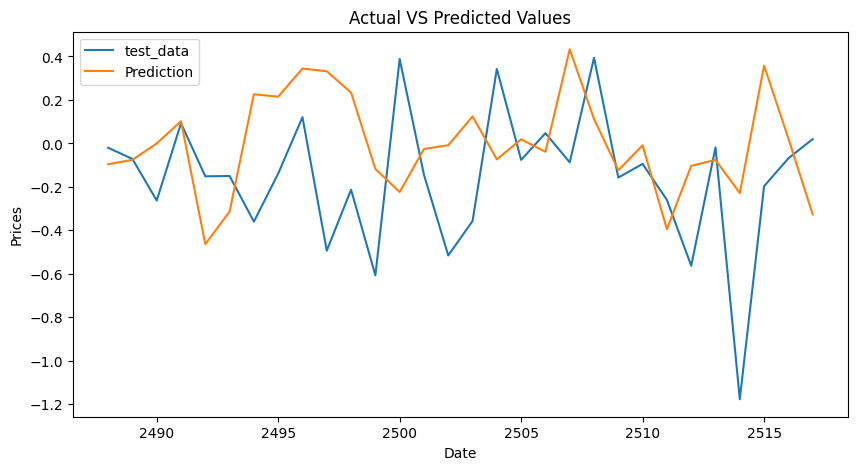

RMSE 0.4


In [80]:
#SARIMA Model

from statsmodels.tsa.statespace.sarimax import SARIMAX

p,d,q=7,1,7
P,D,Q,s=1,1,1,45

model =SARIMAX(train_data, order=(p,d,q), seasonal_order=(P,D,Q,s))
model_fit4=model.fit()


#Prediction
prediction =model_fit4.predict(
    start=len(train_data),
    end=len(train_data)+len(test_data)-1,
    dynamic=False
)

#plot actual and predict data

plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label="test_data")
plt.plot(test_data.index, prediction, label="Prediction")
plt.title("Actual VS Predicted Values")
plt.xlabel("Date")
plt.ylabel("Prices")
plt.legend()
plt.show()


#evaluating model

rmse = round(np.sqrt(mean_squared_error(test_data, prediction)),2)
print("RMSE", rmse)

In [10]:
# Vector model
tsla_data=pd.read_csv("TSLA.csv")

data["Tsla_Close"] = tsla_data['Close']
data["APPL_Close"] = data['Close/Last'].shift()
data.dropna(inplace= True)

from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(data[['APPL_Close', 'Tsla_Close']].dropna(), maxlag=[14])
print()


Granger Causality
number of lags (no zero) 14
ssr based F test:         F=0.5607  , p=0.8967  , df_denom=2474, df_num=14
ssr based chi2 test:   chi2=7.9421  , p=0.8923  , df=14
likelihood ratio test: chi2=7.9295  , p=0.8930  , df=14
parameter F test:         F=0.5607  , p=0.8967  , df_denom=2474, df_num=14



In [90]:
tsla_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [91]:
data

,Date,Close/Last,Volume,Open,High,Low,Tsla_Close,APPL_Close
6,2020-02-20,320.3000,25141490,322.6300,324.6500,318.2100,3.492000,313.0500
7,2020-02-19,323.6200,23495990,320.0000,324.5700,320.0000,3.480000,320.3000
8,2020-02-18,319.0000,38190550,315.3600,319.7500,314.6100,3.410000,323.6200
9,2020-02-14,324.9500,20028450,324.7400,325.9800,322.8500,3.628000,319.0000
10,2020-02-13,324.8700,23686890,324.1900,326.2200,323.3500,3.968000,324.9500
...,...,...,...,...,...,...,...,...
2513,2010-03-05,31.2786,224647427,30.7057,31.3857,30.6614,200.356003,31.2971
2514,2010-03-04,30.1014,89591907,29.8971,30.1314,29.8043,192.169998,31.2786
2515,2010-03-03,29.9043,92846488,29.8486,29.9814,29.7057,197.195999,30.1014
2516,2010-03-02,29.8357,141486282,29.9900,30.1186,29.6771,191.947998,29.9043


In [12]:
data1=data[['APPL_Close', 'Tsla_Close']].diff().dropna()
train_data1, test_data1 = data1[:-14], data1[-14:]

C:\Users\Sajjad\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\Sajjad\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sajjad\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Sajjad\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an inte

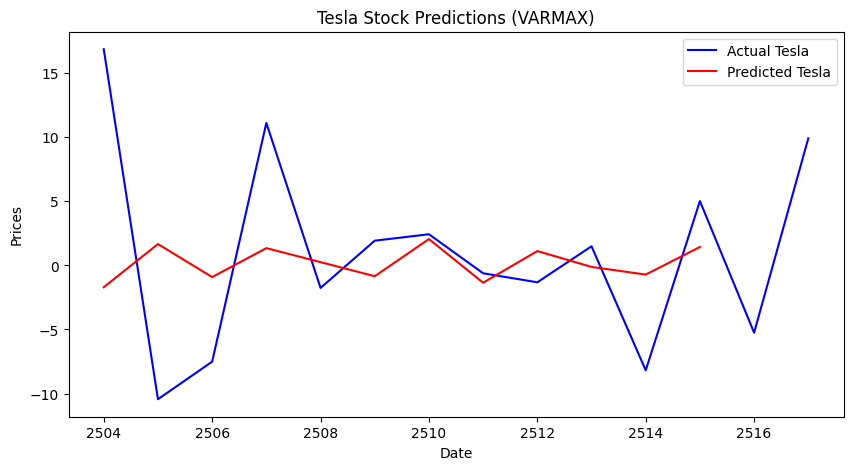

ValueError: Input contains NaN.

In [13]:
from statsmodels.tsa.api import VARMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Fit the VARMAX model
model_varmax = VARMAX(train_data1, order=(7, 7))  # (p, q) where p is for VAR and q for MA
model_fit_varmax = model_varmax.fit(disp=False)

# Forecast the values
predictions_varmax = model_fit_varmax.forecast(steps=len(test_data1))

# Convert predictions to DataFrame
predictions_varmax = pd.DataFrame(predictions_varmax, index=test_data1.index, columns=test_data1.columns)

# Plot predictions against actual values
plt.figure(figsize=(10,5))
plt.plot(test_data1.index, test_data1['Tsla_Close'], label="Actual Tesla", color="blue")
plt.plot(test_data1.index, predictions_varmax['Tsla_Close'], label="Predicted Tesla", color="red")
plt.title("Tesla Stock Predictions (VARMAX)")
plt.xlabel("Date")
plt.ylabel("Prices")
plt.legend()
plt.show()

# Model evaluation - RMSE
rmse_varmax = round(np.sqrt(mean_squared_error(test_data1['Tsla_Close'], predictions_varmax['Tsla_Close'])), 2)
print("RMSE for VARMAX model:", rmse_varmax)


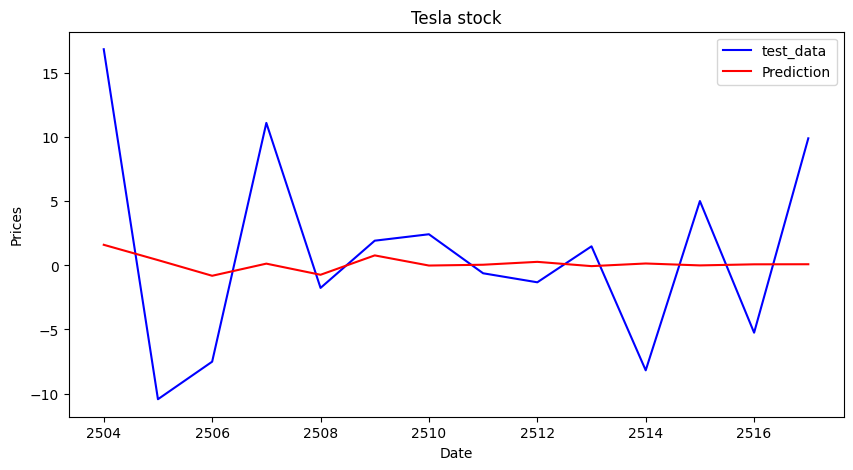

RMSE 7.32


In [107]:
from statsmodels.tsa.api import VAR, VARMAX

#VAR
model=VAR(train_data1)
model_fit=model.fit(maxlags=7)
predictions=model_fit.forecast(train_data1.values[-model_fit.k_ar:], steps=len(test_data1))

predictions=pd.DataFrame(predictions, index=test_data1.index, columns=test_data1.columns)                              
plt.figure(figsize=(10,5))
plt.plot(test_data1.index, test_data1['Tsla_Close'], label="test_data", color="blue")
plt.plot(test_data1.index, predictions["Tsla_Close"], label="Prediction", color="red")
plt.title("Tesla stock")
plt.xlabel("Date")
plt.ylabel("Prices")
plt.legend()
plt.show()


#evaluating model

rmse = round(np.sqrt(mean_squared_error(test_data1['Tsla_Close'], predictions['Tsla_Close'])),2)
print("RMSE", rmse)

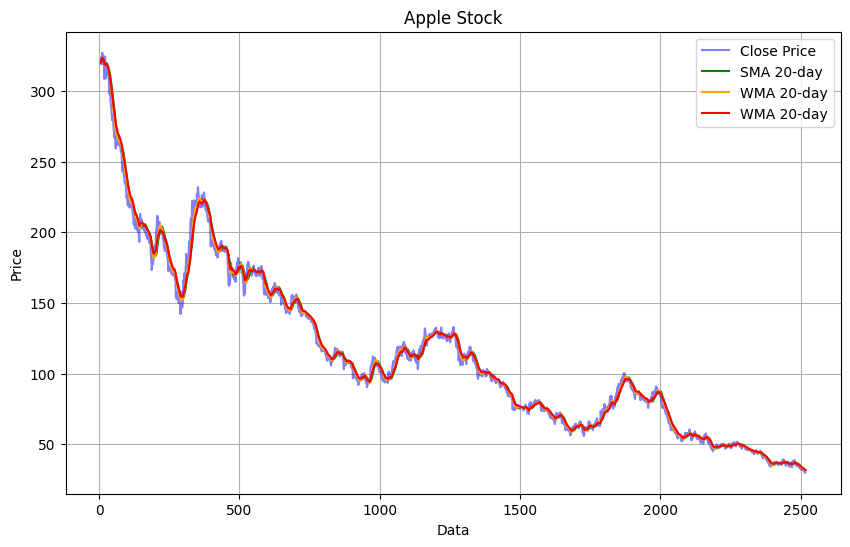

In [115]:
# Smoothing Methods
#Moving aversage

window_size=20
data['SMA'] = data['Close/Last'].rolling(window=window_size).mean()

#Calculating weighted moving average
weights = np.arange(1, window_size+1)
data['WMA'] = data['Close/Last'].rolling(window_size).apply(lambda prices:np.dot(prices, weights)/weights.sum(), raw=True)

#Calculating exponential moving average
data['EMA'] =data['Close/Last'].ewm(span= window_size).mean()

#plotting
plt.figure(figsize=(10,6))
plt.plot(data["Close/Last"], label="Close Price", color='blue', alpha=0.5)
plt.plot(data["SMA"], label=f'SMA {window_size}-day', color='green')
plt.plot(data["WMA"], label=f'WMA {window_size}-day', color='orange')
plt.plot(data["EMA"], label=f'WMA {window_size}-day', color='red')
plt.title("Apple Stock")
plt.xlabel("Data")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

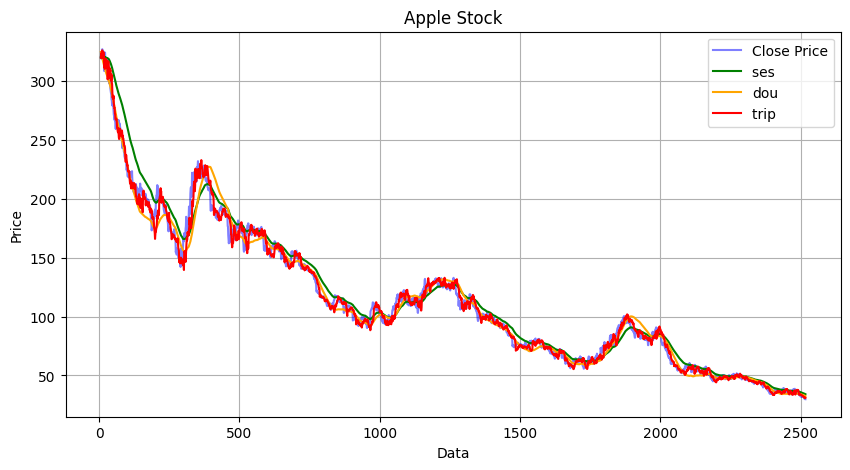

In [126]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

closed=data['Close/Last']
ses = SimpleExpSmoothing(closed).fit(smoothing_level=0.03)
data['ses']=ses.fittedvalues

dou=ExponentialSmoothing(closed, trend='add').fit(smoothing_level=0.03)
data['dou']=dou.fittedvalues

trip=ExponentialSmoothing(closed, trend='add', seasonal='add', seasonal_periods=12).fit(smoothing_level=0.03)
data['trip']=trip.fittedvalues

#plotting
plt.figure(figsize=(10,5))
plt.plot(data["Close/Last"], label="Close Price", color='blue', alpha=0.5)
plt.plot(data["ses"], label=f'ses ', color='green')
plt.plot(data["dou"], label=f'dou', color='orange')
plt.plot(data["trip"], label=f'trip ', color='red')
plt.title("Apple Stock")
plt.xlabel("Data")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

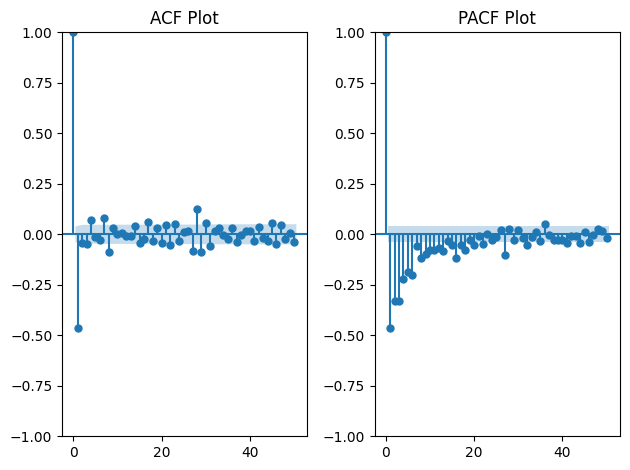

In [130]:
# ACF and PACF plot

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.subplot(1,2,1)
plot_acf(data['Close/Last'].diff().diff().dropna(), ax=plt.gca(), lags=50)
plt.title("ACF Plot")


plt.subplot(1,2,2)
plot_pacf(data['Close/Last'].diff().diff().dropna(), ax=plt.gca(), lags=50, method='ywm')
plt.title("PACF Plot")

plt.tight_layout()
plt.show()

In [134]:
#Model Evaluating

train_data, test_data = apple_price[:-30], apple_price[-30:]

model=AutoReg(train_data, lags=30)
model_fit=model.fit()

prediction=model_fit.predict(
    start=len(train_data), 
    end=len(train_data)+len(test_data)-1,
    dynamic=False)


In [139]:
from sklearn.metrics import mean_absolute_error
mean1=mean_absolute_error(test_data, prediction)
print("this is MAE", mean1)

mean2=mean_squared_error(test_data, prediction)
print("this is MSE", mean2)

emse=np.sqrt(mean2)
print("this is emse", emse)

mean4=np.mean(np.abs((list(test_data)-prediction)/list(test_data)))*100
print("this is MAPE", mean4)

aic=model_fit.aic
print("this is aic", aic)
bic=model_fit.bic
print("this is bic", bic) 

this is MAE 0.22132400987239334
this is MSE 0.09695090484477009
this is emse 0.3113694025506843
this is MAPE 151.05510976157777
this is aic 10280.111587800173
this is bic 10465.92587172085


In [147]:
dat={
    'Date':['2024-01-01','2024-01-02','2024-01-04','2024-01-07','2024-01-08','2024-01-09','2024-01-10','2024-01-12'],
    'price':[100,101,103,106,107,108,109,111],
}

dat=pd.DataFrame(dat)
dat['Date']=pd.to_datetime(dat['Date'])
dat.set_index("Date", inplace=True)
dat

,price
Date,
2024-01-01,100
2024-01-02,101
2024-01-04,103
2024-01-07,106
2024-01-08,107
2024-01-09,108
2024-01-10,109
2024-01-12,111


In [148]:
#creating complete data range

Complete = pd.date_range(start="2024-01-01", end="2024-01-12", freq='D')

dat = dat.reindex(Complete)
print(dat)

            price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03    NaN
2024-01-04  103.0
2024-01-05    NaN
2024-01-06    NaN
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11    NaN
2024-01-12  111.0


In [153]:
#Data processing , Imputation
#Mean imputation

mean1=dat.mean()
data_mean=dat.fillna(mean1)

mead=dat.median()
data_med=dat.fillna(mead)

mod=dat.mode()
data_mod=dat.fillna(mod. values[0][0])

data_fill=dat.ffill()
data_bfill=dat.bfill()

print(dat)
print("111",mean1.values[0])
print("112",mead.values[0])
print("11",mod.values[0][0])
print("121",data_fill)
print("6",data_bfill)

            price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03    NaN
2024-01-04  103.0
2024-01-05    NaN
2024-01-06    NaN
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11    NaN
2024-01-12  111.0
111 105.625
112 106.5
11 100.0
121             price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  101.0
2024-01-04  103.0
2024-01-05  103.0
2024-01-06  103.0
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11  109.0
2024-01-12  111.0
6             price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  103.0
2024-01-04  103.0
2024-01-05  106.0
2024-01-06  106.0
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11  111.0
2024-01-12  111.0
